In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-dataset/users.csv
/kaggle/input/sample-dataset/likes.csv
/kaggle/input/sample-dataset/users-likes.csv


In [3]:
import pandas as pd

users_df = pd.read_csv('/kaggle/input/sample-dataset/users.csv')
likes_df = pd.read_csv('/kaggle/input/sample-dataset/likes.csv') #/content/drive/MyDrive/sample_dataset/likes.csv
users_likes_df = pd.read_csv('/kaggle/input/sample-dataset/users-likes.csv')

filtered_users_likes_df = users_likes_df[users_likes_df['userid'].isin(users_df['userid'])]

merged_df = filtered_users_likes_df.merge(likes_df, left_on='likeid', right_on='likeid')

final_df = merged_df.merge(users_df, left_on='userid', right_on='userid')

final_df.to_csv('final.csv', index=False)

In [4]:
final_df = pd.read_csv('final.csv')

num_rows = final_df.shape[0]

print(f'The final dataset contains {num_rows} rows.')

The final dataset contains 10612326 rows.


In [5]:
final_df.dropna(inplace=True)

num_rows = final_df.shape[0]

print(f'The final dataset contains {num_rows} rows.')

The final dataset contains 2571490 rows.


In [6]:
na_values = final_df.isna().sum()

print(na_values)

any_na = final_df.isna().any().any()
print(f'Are there any NA values left in the dataset? {any_na}')

userid       0
likeid       0
name         0
gender       0
age          0
political    0
ope          0
con          0
ext          0
agr          0
neu          0
dtype: int64
Are there any NA values left in the dataset? False


In [7]:
print("First few rows for a sanity check:")
print(final_df.head())
print("\nLast few rows for a sanity check:")
print(final_df.tail())

duplicate_rows = final_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

print("\nDescriptive statistics for numerical columns:")
print(final_df.describe())

print("\nValue counts for categorical columns:")
for col in final_df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(final_df[col].value_counts())

print("\nData types of each column:")
print(final_df.dtypes)


First few rows for a sanity check:
                                userid                            likeid  \
7774  ce110562b3e2f7e5cad3775b32d9caa5  b65f46d64c688fe98bdbcf93a76a71fc   
7775  ce110562b3e2f7e5cad3775b32d9caa5  295533f33bf160e76d7e95efadfe196c   
7776  ce110562b3e2f7e5cad3775b32d9caa5  a4f3b9c60196cb0920b2868d057c7961   
7777  ce110562b3e2f7e5cad3775b32d9caa5  1c88edef6a3d9b9fba1381f3db085dc9   
7778  ce110562b3e2f7e5cad3775b32d9caa5  e327fc881114e13a28e7513f6b85c4b1   

                                              name  gender  age  political  \
7774  Yo también me rei de la caída de otro jejeje       1   27        0.0   
7775                                       Titanic       1   27        0.0   
7776                                  Skinny Jeans       1   27        0.0   
7777                                        iTunes       1   27        0.0   
7778                         Official Grease Movie       1   27        0.0   

       ope   con   ext   agr   neu  
77

In [8]:
final_df = final_df.sample(n=100000, random_state=42)

final_df.to_csv('subset_dataset.csv', index=False)

In [9]:
num_rows = final_df.shape[0]

print(f'The final dataset contains {num_rows} rows.')

The final dataset contains 100000 rows.


gender
1    58555
0    41445
Name: count, dtype: int64


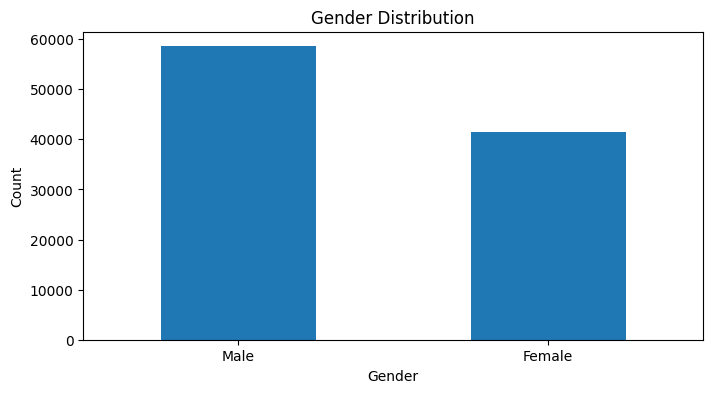

In [10]:
import matplotlib.pyplot as plt

gender_counts = final_df['gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

political
0.0    70007
1.0    29993
Name: count, dtype: int64


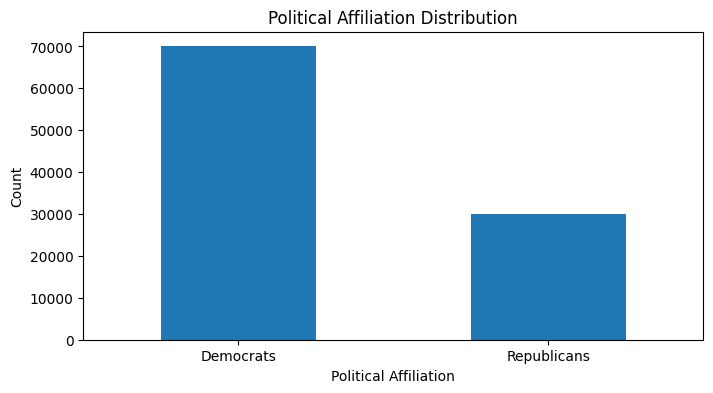

In [11]:
political_counts = final_df['political'].value_counts()
print(political_counts)

plt.figure(figsize=(8, 4))
political_counts.plot(kind='bar')
plt.title('Political Affiliation Distribution')
plt.xlabel('Political Affiliation')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Democrats', 'Republicans'], rotation=0)
plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(sparse=True)  
likes_matrix = encoder.fit_transform(final_df[['likeid']])

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42) 
likes_matrix_reduced = svd.fit_transform(likes_matrix)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype)

In [14]:
from sklearn.model_selection import train_test_split

ocean_features = final_df[['ope', 'con', 'ext', 'agr', 'neu']].values

X = np.hstack((likes_matrix_reduced, ocean_features))
y = final_df[['age', 'gender', 'political']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

y_gender = y_train.iloc[:, 1] 
X_train_balanced, y_gender_balanced = smote.fit_resample(X_train, y_gender)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [17]:
y_political = y_train.iloc[:, 2]
X_train_political_balanced, y_political_balanced = smote.fit_resample(X_train, y_political)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

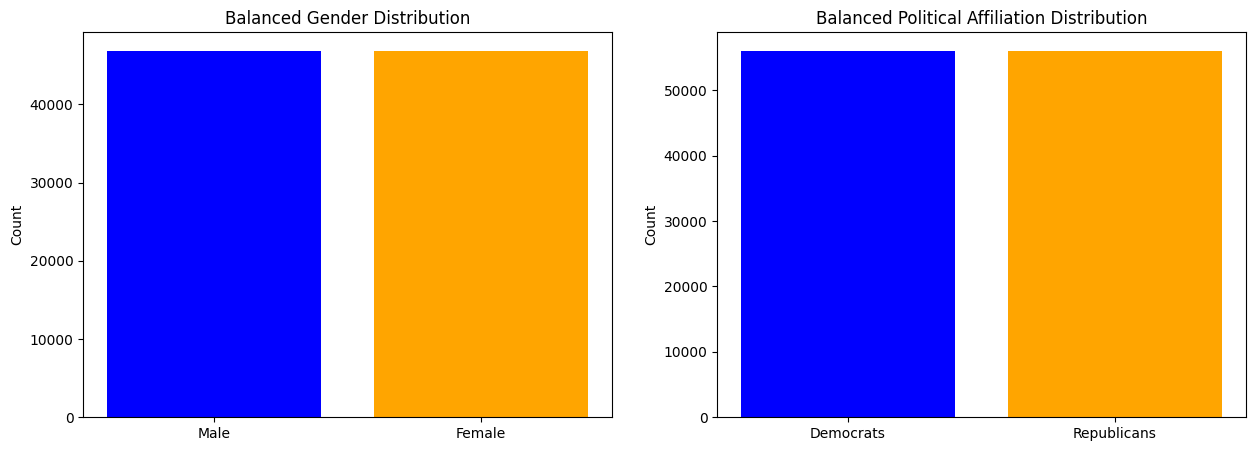

In [18]:
import matplotlib.pyplot as plt

gender_counts_balanced = pd.Series(y_gender_balanced).value_counts()

political_counts_balanced = pd.Series(y_political_balanced).value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(gender_counts_balanced.index, gender_counts_balanced.values, color=['blue', 'orange'])
axes[0].set_title('Balanced Gender Distribution')
axes[0].set_xticks(gender_counts_balanced.index)
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].set_ylabel('Count')

axes[1].bar(political_counts_balanced.index, political_counts_balanced.values, color=['blue', 'orange'])
axes[1].set_title('Balanced Political Affiliation Distribution')
axes[1].set_xticks(political_counts_balanced.index)
axes[1].set_xticklabels(['Democrats', 'Republicans'])
axes[1].set_ylabel('Count')

plt.show()

In [19]:
personality_scores_min_max = final_df[['ope', 'con', 'ext', 'agr', 'neu']].agg(['min', 'max'])
print(personality_scores_min_max)

      ope   con   ext   agr   neu
min -5.49 -3.67 -3.08 -4.17 -2.13
max  1.90  2.24  1.92  2.32  2.85


In [20]:
anomalies = final_df.isnull().sum()
print("Anomalies in each column after merging:")
print(anomalies)

unique_users = final_df['userid'].nunique()
unique_likes = final_df['likeid'].nunique()
print(f"Unique users: {unique_users}, Unique likes: {unique_likes}")

numerical_stats = final_df.describe()
print(numerical_stats)
print(final_df.dtypes)

duplicate_ids = final_df['userid'].duplicated().sum()
print(f"Duplicate user IDs found: {duplicate_ids}")

duplicate_likes_per_user = final_df.duplicated(subset=['userid', 'likeid']).sum()
print(f"Duplicate likes per user found: {duplicate_likes_per_user}")

logical_inconsistencies = (final_df['age'] < 0) | (final_df['ope'] < -5.49) | (final_df['ope'] > 1.90)
print(f"Logical inconsistencies found: {logical_inconsistencies.sum()}")

Anomalies in each column after merging:
userid       0
likeid       0
name         0
gender       0
age          0
political    0
ope          0
con          0
ext          0
agr          0
neu          0
dtype: int64
Unique users: 16726, Unique likes: 53178
              gender            age      political            ope  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.585550      28.377050       0.299930       0.262972   
std         0.492629       7.783364       0.458229       1.002230   
min         0.000000      18.000000       0.000000      -5.490000   
25%         0.000000      24.000000       0.000000      -0.410000   
50%         1.000000      26.000000       0.000000       0.420000   
75%         1.000000      30.000000       1.000000       1.070000   
max         1.000000      79.000000       1.000000       1.900000   

                 con            ext            agr            neu  
count  100000.000000  100000.000000  100000.000000 

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ocean_features_scaled = scaler.fit_transform(final_df[['ope', 'con', 'ext', 'agr', 'neu']])
print(ocean_features_scaled)

[[ 0.52585744 -0.18396749  1.33523857  0.69797269 -0.40575164]
 [ 1.17441411 -0.54916173  0.08906121  0.61017444  0.88937193]
 [ 1.08461396 -0.84526517  0.20869423 -0.60924573  1.62096845]
 ...
 [-0.2124994   0.10226584  0.20869423  0.53213155 -1.26587187]
 [ 0.89503585 -0.84526517  0.20869423  0.12240637  0.64221095]
 [ 0.06687887  0.546421    1.52465752  1.58571057 -2.1259921 ]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [22]:
X_combined = np.hstack((likes_matrix_reduced, ocean_features_scaled))

y_age = final_df['age']
y_gender = final_df['gender']
y_political = final_df['political']

In [23]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test, y_political_train, y_political_test = train_test_split(
    X_combined, y_age, y_gender, y_political, test_size=0.2, random_state=42)

input_layer = Input(shape=(X_train.shape[1],))
x = Dense(512, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
age_output = Dense(1, activation='linear', name='age_output')(x)  
gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)  
political_output = Dense(1, activation='sigmoid', name='political_output')(x) 

model = Model(inputs=input_layer, outputs=[age_output, gender_output, political_output])

model.compile(optimizer='adam',
              loss={'age_output': 'mean_squared_error',
                    'gender_output': 'binary_crossentropy',
                    'political_output': 'binary_crossentropy'},
              metrics={'age_output': ['mae'],
                       'gender_output': ['accuracy'],
                       'political_output': ['accuracy']})

history = model.fit(X_train, {'age_output': y_age_train, 
                              'gender_output': y_gender_train, 
                              'political_output': y_political_train},
                    validation_data=(X_test, {'age_output': y_age_test, 
                                              'gender_output': y_gender_test, 
                                              'political_output': y_political_test}),
                    epochs=70, 
                    batch_size=16)

eval_results = model.evaluate(X_test, {'age_output': y_age_test, 
                                       'gender_output': y_gender_test, 
                                       'political_output': y_political_test})
print("--------------------------------------------------------------------------------------")
print("Test Loss, Test Accuracy:", eval_results)


Epoch 1/70
5000/5000 [==============================] - 44s 7ms/step - loss: 114.4405 - age_output_loss: 113.2227 - gender_output_loss: 0.6726 - political_output_loss: 0.5454 - age_output_mae: 7.2289 - gender_output_accuracy: 0.5949 - political_output_accuracy: 0.7258 - val_loss: 58.5267 - val_age_output_loss: 57.3534 - val_gender_output_loss: 0.6577 - val_political_output_loss: 0.5158 - val_age_output_mae: 5.2265 - val_gender_output_accuracy: 0.6239 - val_political_output_accuracy: 0.7505
Epoch 2/70
5000/5000 [==============================] - 35s 7ms/step - loss: 61.5114 - age_output_loss: 60.3124 - gender_output_loss: 0.6595 - political_output_loss: 0.5394 - age_output_mae: 5.4680 - gender_output_accuracy: 0.6079 - political_output_accuracy: 0.7352 - val_loss: 58.5401 - val_age_output_loss: 57.3797 - val_gender_output_loss: 0.6549 - val_political_output_loss: 0.5056 - val_age_output_mae: 5.1849 - val_gender_output_accuracy: 0.6058 - val_political_output_accuracy: 0.7485
Epoch 3/70
5

625/625 [==============================] - 1s 2ms/step


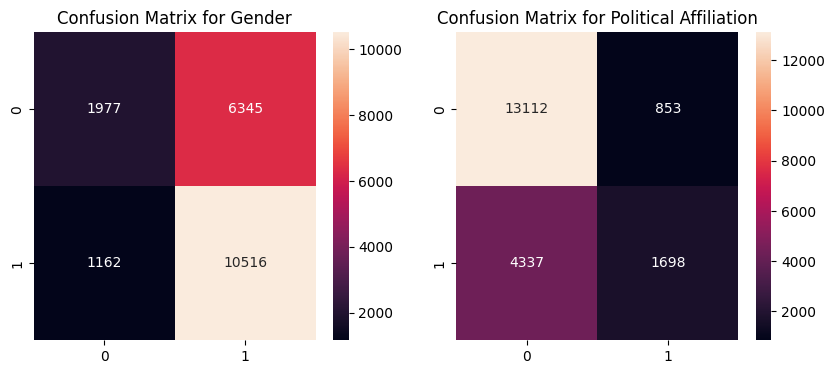

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test)
age_preds, gender_preds, political_preds = predictions

gender_preds = (gender_preds > 0.5).astype('int32')
political_preds = (political_preds > 0.5).astype('int32')

cm_gender = confusion_matrix(y_gender_test, gender_preds)

cm_political = confusion_matrix(y_political_test, political_preds)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_gender, annot=True, fmt='d')
plt.title('Confusion Matrix for Gender')

plt.subplot(1, 2, 2)
sns.heatmap(cm_political, annot=True, fmt='d')
plt.title('Confusion Matrix for Political Affiliation')

plt.show()


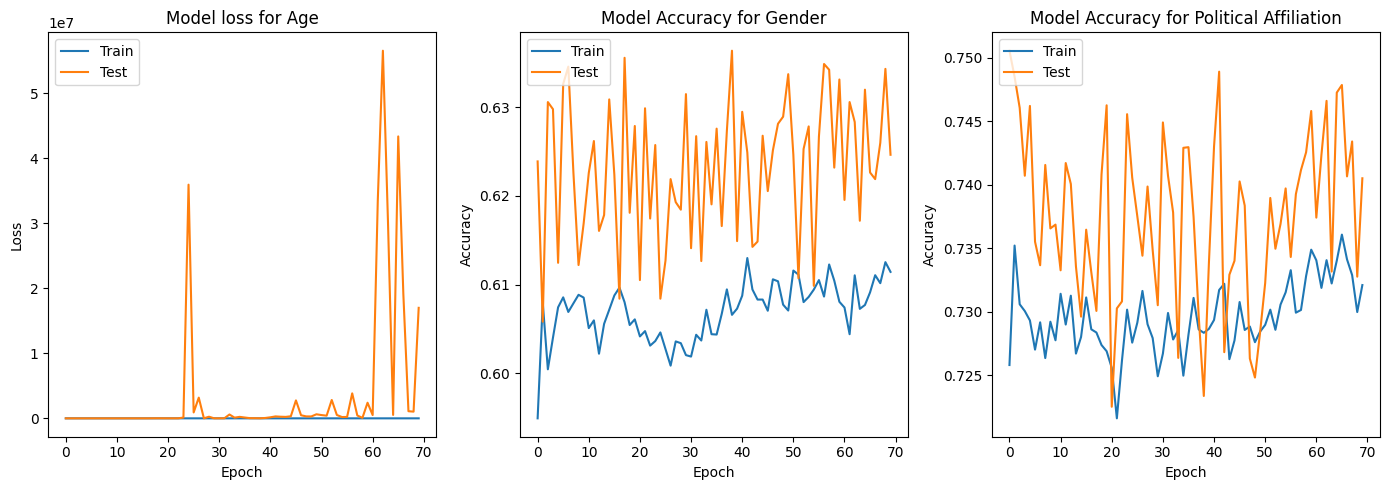

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['age_output_loss'])
plt.plot(history.history['val_age_output_loss'])
plt.title('Model loss for Age')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.title('Model Accuracy for Gender')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(history.history['political_output_accuracy'])
plt.plot(history.history['val_political_output_accuracy'])
plt.title('Model Accuracy for Political Affiliation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, message='A NumPy version')

In [25]:
'''#Random Forest for Gender Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the classifier
rf_cls = RandomForestClassifier(random_state=42)

# Define a more extensive parameter grid
param_grid_rf_cls = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search_rf_cls = GridSearchCV(rf_cls, param_grid_rf_cls, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_rf_cls.fit(X_train, y_gender_train)

print(f"Best parameters for gender classification: {grid_search_rf_cls.best_params_}")
print(f"Best cross-validation accuracy for gender classification: {grid_search_rf_cls.best_score_}")'''

'#Random Forest for Gender Classification\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# Initialize the classifier\nrf_cls = RandomForestClassifier(random_state=42)\n\n# Define a more extensive parameter grid\nparam_grid_rf_cls = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [10, 20, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'bootstrap\': [True, False]\n}\n\n# Perform grid search with cross-validation\ngrid_search_rf_cls = GridSearchCV(rf_cls, param_grid_rf_cls, cv=10, scoring=\'accuracy\', n_jobs=-1)\ngrid_search_rf_cls.fit(X_train, y_gender_train)\n\nprint(f"Best parameters for gender classification: {grid_search_rf_cls.best_params_}")\nprint(f"Best cross-validation accuracy for gender classification: {grid_search_rf_cls.best_score_}")'

In [26]:
'''# We can reuse the classifier and parameter grid defined for gender classification
# since the task type is the same: binary classification.

# Perform grid search with cross-validation
grid_search_rf_pol = GridSearchCV(rf_cls, param_grid_rf_cls, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_rf_pol.fit(X_train, y_political_train)

print(f"Best parameters for political affiliation classification: {grid_search_rf_pol.best_params_}")
print(f"Best cross-validation accuracy for political affiliation classification: {grid_search_rf_pol.best_score_}")'''


'# We can reuse the classifier and parameter grid defined for gender classification\n# since the task type is the same: binary classification.\n\n# Perform grid search with cross-validation\ngrid_search_rf_pol = GridSearchCV(rf_cls, param_grid_rf_cls, cv=10, scoring=\'accuracy\', n_jobs=-1)\ngrid_search_rf_pol.fit(X_train, y_political_train)\n\nprint(f"Best parameters for political affiliation classification: {grid_search_rf_pol.best_params_}")\nprint(f"Best cross-validation accuracy for political affiliation classification: {grid_search_rf_pol.best_score_}")'

In [27]:
'''#Random Forest for Age Prediction (Regression)
from sklearn.ensemble import RandomForestRegressor

# Initialize the regressor
rf_reg = RandomForestRegressor(random_state=42)

# Define a parameter grid
param_grid_rf_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search_rf_reg = GridSearchCV(rf_reg, param_grid_rf_reg, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_reg.fit(X_train, y_age_train)

print(f"Best parameters for age prediction: {grid_search_rf_reg.best_params_}")
print(f"Best cross-validation MSE for age prediction: {-grid_search_rf_reg.best_score_}")'''


'#Random Forest for Age Prediction (Regression)\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Initialize the regressor\nrf_reg = RandomForestRegressor(random_state=42)\n\n# Define a parameter grid\nparam_grid_rf_reg = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [10, 20, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'bootstrap\': [True, False]\n}\n\n# Perform grid search with cross-validation\ngrid_search_rf_reg = GridSearchCV(rf_reg, param_grid_rf_reg, cv=10, scoring=\'neg_mean_squared_error\', n_jobs=-1)\ngrid_search_rf_reg.fit(X_train, y_age_train)\n\nprint(f"Best parameters for age prediction: {grid_search_rf_reg.best_params_}")\nprint(f"Best cross-validation MSE for age prediction: {-grid_search_rf_reg.best_score_}")'

In [28]:
'''import xgboost as xgb

# Convert the dataset to DMatrix form, which is required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_gender_train)

# Define parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'gpu_hist',  # use 'hist' if not using GPU
    'random_state': 42
}

# Perform cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # number of boosting rounds
    nfold=10,  # number of folds for CV
    metrics={'logloss'},  # evaluation metrics
    early_stopping_rounds=10,  # stops if no improvement for 10 consecutive rounds
    seed=42
)

print(f"CV logloss score: {cv_results['test-logloss-mean'].min()}")'''


'import xgboost as xgb\n\n# Convert the dataset to DMatrix form, which is required by XGBoost\ndtrain = xgb.DMatrix(X_train, label=y_gender_train)\n\n# Define parameters for the XGBoost model\nparams = {\n    \'objective\': \'binary:logistic\',\n    \'eval_metric\': \'logloss\',\n    \'tree_method\': \'gpu_hist\',  # use \'hist\' if not using GPU\n    \'random_state\': 42\n}\n\n# Perform cross-validation\ncv_results = xgb.cv(\n    params=params,\n    dtrain=dtrain,\n    num_boost_round=100,  # number of boosting rounds\n    nfold=10,  # number of folds for CV\n    metrics={\'logloss\'},  # evaluation metrics\n    early_stopping_rounds=10,  # stops if no improvement for 10 consecutive rounds\n    seed=42\n)\n\nprint(f"CV logloss score: {cv_results[\'test-logloss-mean\'].min()}")'

In [29]:
'''import lightgbm as lgb
from sklearn.model_selection import cross_val_score

# For gender and political (classification)
lgb_cls = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    device='gpu',
    random_state=42
)

# Perform 10-fold cross-validation for gender classification
gender_cv_scores = cross_val_score(lgb_cls, X_train, y_gender_train, cv=10, scoring='accuracy', n_jobs=-1)

# Perform 10-fold cross-validation for political classification
political_cv_scores = cross_val_score(lgb_cls, X_train, y_political_train, cv=10, scoring='accuracy', n_jobs=-1)

# For age (regression)
lgb_reg = lgb.LGBMRegressor(
    objective='regression',
    metric='mse',
    device='gpu',
    random_state=42
)

# Perform 10-fold cross-validation for age regression
age_cv_scores = cross_val_score(lgb_reg, X_train, y_age_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

print(f"Cross-Validation Accuracy for Gender (LightGBM): {gender_cv_scores.mean()}")
print(f"Cross-Validation Accuracy for Political Affiliation (LightGBM): {political_cv_scores.mean()}")
print(f"Cross-Validation Mean Squared Error for Age (LightGBM): {-age_cv_scores.mean()}")'''


'import lightgbm as lgb\nfrom sklearn.model_selection import cross_val_score\n\n# For gender and political (classification)\nlgb_cls = lgb.LGBMClassifier(\n    objective=\'binary\',\n    metric=\'binary_logloss\',\n    device=\'gpu\',\n    random_state=42\n)\n\n# Perform 10-fold cross-validation for gender classification\ngender_cv_scores = cross_val_score(lgb_cls, X_train, y_gender_train, cv=10, scoring=\'accuracy\', n_jobs=-1)\n\n# Perform 10-fold cross-validation for political classification\npolitical_cv_scores = cross_val_score(lgb_cls, X_train, y_political_train, cv=10, scoring=\'accuracy\', n_jobs=-1)\n\n# For age (regression)\nlgb_reg = lgb.LGBMRegressor(\n    objective=\'regression\',\n    metric=\'mse\',\n    device=\'gpu\',\n    random_state=42\n)\n\n# Perform 10-fold cross-validation for age regression\nage_cv_scores = cross_val_score(lgb_reg, X_train, y_age_train, cv=10, scoring=\'neg_mean_squared_error\', n_jobs=-1)\n\nprint(f"Cross-Validation Accuracy for Gender (LightGB

In [30]:
'''import xgboost as xgb
from sklearn.model_selection import cross_val_score

# For gender and political (classification)
xgb_cls = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    tree_method='gpu_hist',
    random_state=63
)

# Perform 10-fold cross-validation for gender classification
gender_cv_scores = cross_val_score(xgb_cls, X_train, y_gender_train, cv=10, scoring='accuracy', n_jobs=-1)

# Perform 10-fold cross-validation for political classification
political_cv_scores = cross_val_score(xgb_cls, X_train, y_political_train, cv=10, scoring='accuracy', n_jobs=-1)

# For age (regression)
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',
    random_state=42
)

# Perform 10-fold cross-validation for age regression
age_cv_scores = cross_val_score(xgb_reg, X_train, y_age_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

print(f"Cross-Validation Accuracy for Gender (XGBoost): {gender_cv_scores.mean()}")
print(f"Cross-Validation Accuracy for Political Affiliation (XGBoost): {political_cv_scores.mean()}")
print(f"Cross-Validation Mean Squared Error for Age (XGBoost): {-age_cv_scores.mean()}")'''


'import xgboost as xgb\nfrom sklearn.model_selection import cross_val_score\n\n# For gender and political (classification)\nxgb_cls = xgb.XGBClassifier(\n    objective=\'binary:logistic\',\n    eval_metric=\'logloss\',\n    use_label_encoder=False,\n    tree_method=\'gpu_hist\',\n    random_state=63\n)\n\n# Perform 10-fold cross-validation for gender classification\ngender_cv_scores = cross_val_score(xgb_cls, X_train, y_gender_train, cv=10, scoring=\'accuracy\', n_jobs=-1)\n\n# Perform 10-fold cross-validation for political classification\npolitical_cv_scores = cross_val_score(xgb_cls, X_train, y_political_train, cv=10, scoring=\'accuracy\', n_jobs=-1)\n\n# For age (regression)\nxgb_reg = xgb.XGBRegressor(\n    objective=\'reg:squarederror\',\n    tree_method=\'gpu_hist\',\n    random_state=42\n)\n\n# Perform 10-fold cross-validation for age regression\nage_cv_scores = cross_val_score(xgb_reg, X_train, y_age_train, cv=10, scoring=\'neg_mean_squared_error\', n_jobs=-1)\n\nprint(f"Cross-

In [31]:
'''#Discontinued SVM because it is taking longer than expected
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

# Initialize the SVM classifier
svm_classifier = SVC(probability=True, random_state=42)

# Define a parameter grid to search for the best parameters
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type to be used in the algorithm
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
    'class_weight': ['balanced', None]  # Use 'balanced' to adjust weights inversely proportional to class frequencies
}

# Grid search with cross-validation
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_gender_train)

# Best estimator and its accuracy
best_svm_classifier = grid_search_svm.best_estimator_
svm_cv_accuracy = cross_val_score(best_svm_classifier, X_train, y_gender_train, cv=10, scoring='accuracy')

print(f"Best SVM Parameters: {grid_search_svm.best_params_}")
print(f"Cross-Validation Accuracy for SVM: {svm_cv_accuracy.mean()}")'''


'#Discontinued SVM because it is taking longer than expected\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score, make_scorer\nfrom sklearn.model_selection import cross_val_score\n\n# Initialize the SVM classifier\nsvm_classifier = SVC(probability=True, random_state=42)\n\n# Define a parameter grid to search for the best parameters\nparam_grid_svm = {\n    \'C\': [0.1, 1, 10],  # Regularization parameter\n    \'kernel\': [\'linear\', \'rbf\'],  # Kernel type to be used in the algorithm\n    \'gamma\': [\'scale\', \'auto\'],  # Kernel coefficient for \'rbf\'\n    \'class_weight\': [\'balanced\', None]  # Use \'balanced\' to adjust weights inversely proportional to class frequencies\n}\n\n# Grid search with cross-validation\ngrid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=10, scoring=\'accuracy\', n_jobs=-1)\ngrid_search_svm.fit(X_train, y_gender_train)\n\n# Best estimator and its accuracy\nbest_svm_

In [32]:
'''from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Let's assume likes_matrix_reduced contains your dimensionality-reduced likeID features
# and ocean_features contains your OCEAN scores.
# Replace these with the actual variable names you have in your workspace.
# X_combined will be your feature matrix for training.
X_combined = np.hstack((likes_matrix_reduced, ocean_features))

# Separate your features and targets.
y_age = final_df['age']
y_gender = final_df['gender']
y_political = final_df['political']

# Split your dataset into training and test sets.
X_train, X_test, y_age_train, y_age_test = train_test_split(X_combined, y_age, test_size=0.2, random_state=42)
_, _, y_gender_train, y_gender_test = train_test_split(X_combined, y_gender, test_size=0.2, random_state=42)
_, _, y_political_train, y_political_test = train_test_split(X_combined, y_political, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor for 'age' and Classifiers for 'gender' and 'political'.
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42
)
gb_classifier_gender = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42
)

gb_classifier_political = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42
)

# Perform 10-fold cross-validation for the 'age' regressor and print the mean squared error.
age_scores = cross_val_score(gb_regressor, X_train, y_age_train, cv=10, scoring='neg_mean_squared_error')
print(f"Age prediction - Mean Squared Error: {age_scores.mean():.3f} (+/- {age_scores.std() * 2:.3f})")

# Perform 10-fold cross-validation for the 'gender' classifier and print the accuracy.
gender_scores = cross_val_score(gb_classifier_gender, X_train, y_gender_train, cv=10, scoring='accuracy')
print(f"Gender prediction - Accuracy: {gender_scores.mean():.3f} (+/- {gender_scores.std() * 2:.3f})")

# Perform 10-fold cross-validation for the 'political' classifier and print the accuracy.
political_scores = cross_val_score(gb_classifier_political, X_train, y_political_train, cv=10, scoring='accuracy')
print(f"Political prediction - Accuracy: {political_scores.mean():.3f} (+/- {political_scores.std() * 2:.3f})")

# Fit the models on the entire training data.
gb_regressor.fit(X_train, y_age_train)
gb_classifier_gender.fit(X_train, y_gender_train)
gb_classifier_political.fit(X_train, y_political_train)

# Predict on the test set.
age_predictions = gb_regressor.predict(X_test)
gender_predictions = gb_classifier_gender.predict(X_test)
political_predictions = gb_classifier_political.predict(X_test)

# Now you have predictions for age, gender, and political affiliation on your test set.
# You can evaluate these predictions using appropriate metrics.'''


'from sklearn.model_selection import cross_val_score, train_test_split\nfrom sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier\n\n# Let\'s assume likes_matrix_reduced contains your dimensionality-reduced likeID features\n# and ocean_features contains your OCEAN scores.\n# Replace these with the actual variable names you have in your workspace.\n# X_combined will be your feature matrix for training.\nX_combined = np.hstack((likes_matrix_reduced, ocean_features))\n\n# Separate your features and targets.\ny_age = final_df[\'age\']\ny_gender = final_df[\'gender\']\ny_political = final_df[\'political\']\n\n# Split your dataset into training and test sets.\nX_train, X_test, y_age_train, y_age_test = train_test_split(X_combined, y_age, test_size=0.2, random_state=42)\n_, _, y_gender_train, y_gender_test = train_test_split(X_combined, y_gender, test_size=0.2, random_state=42)\n_, _, y_political_train, y_political_test = train_test_split(X_combined, y_political, test